In [ ]:
'''0907避免kernel dead'''
'''ML_noerror.csv'''
import random
import torch
from torch import nn, optim
import math
from IPython import display
import numpy as np

# N = 1000  # num_samples_per_class
D = 5  # dimensions
C = 1  # num_classes
H = 100  # num_hidden_units

filename = "ML_noerror.csv"     # print(data)
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, encoding = 'UTF-8')     #, usecols = [7,15,37,38,53]
[Row,Column] = data.shape     # 確認data(?)...print(data.shape); print(data); print(type(data[1,0]))
learning_rate = 2e-2
lambda_l2 = 9e-5
n_networks = 1     # Number of networks
criterion = torch.nn.MSELoss()     # nn package also has different loss functions. We use MSE for a regression task
totalerr_train = [];
totalerr_test = [];
total_corr = [];

for i in range(10):
    train_set = [];
    test_set = [];
    models = list()
    y_pretrain = list()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    for j in range(len(data)):
        if j%10 == i:
            test_set.append(j)
        else:
            train_set.append(j)
    X = torch.from_numpy(data[train_set,1:6].astype(np.float64))
    y = torch.from_numpy(data[train_set,0:1].astype(np.float64))
    X_test = torch.from_numpy(data[test_set,1:6].astype(np.float64))
    y_test = torch.from_numpy(data[test_set,0:1].astype(np.float64))
    for mod in range(n_networks):
      # nn package to create our linear model     # https://stackoverflow.com/questions/46141690/how-do-i-write-a-pytorch-sequential-model
      # each Linear module has a weight and bias     # https://discuss.pytorch.org/t/mlp-with-one-hidden-layer-dimensions-modules/48841
        model = nn.Sequential(
            nn.Linear(D, H),
            nn.ReLU(),     # if mod < n_networks // 2 else nn.Tanh(),
            nn.Linear(H, C)
        )
        model.to(device)
      # Append models
        models.append(model)
      # we use the optim package to apply
      # ADAM for our parameter updates
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)     # built-in L2
      # e = 1.  # plotting purpose.
      ## Training
        for t in range(1000):
          # Feed forward to get the logits     # print("test_set = ", test_set);     # 檢查是否正確取樣
            y_pred = model(X.float())
          # Append pre-train output
            if t == 0:
                y_pretrain.append(y_pred.detach())
          # Compute the loss and accuracy
            loss = torch.sqrt(criterion(y_pred.float(), y.float()))
            print(f"[Round]: {i+1}, [MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
            display.clear_output(wait=True)
          # zero the gradients before running
          # the backward pass.
            optimizer.zero_grad()
          # Backward pass to compute the gradient
          # of loss w.r.t our learnable params. 
            loss.backward()
          # Update params
            optimizer.step()
            if t == 999:
                totalerr_train.append(np.round(loss.item(),6))  
              ## Testing
                y_test_pred = model(X_test.float())
              # Compute the loss and accuracy
                loss_test = torch.sqrt(criterion(y_test_pred.float(), y_test.float()))
                y_test_array = []; y_test_pred_array = [];
                for i in range(len(y_test)):
                    y_test_array.append(y_test.detach().numpy()[i][0].astype(np.float64))
                    y_test_pred_array.append(y_test_pred.detach().numpy()[i][0].astype(np.float64))
                R = np.corrcoef(y_test_array, y_test_pred_array)[0,1];     ##[0,1]
                R_sq = np.round(R*R,3)
                totalerr_test.append(np.round(loss_test.item(),6))
                total_corr.append(np.round(R_sq,3))

print("Result_train = ", totalerr_train); print(np.round(np.mean(totalerr_train),3))
print("Result_test = ", totalerr_test); print(np.round(np.mean(totalerr_test),3))
print("total_corr(^2) = ", total_corr); print(np.round(np.mean(total_corr),3))


[Round]: 1, [MODEL]: 1, [EPOCH]: 999, [LOSS]: 5.562027


In [24]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
import numpy as np

'''Input資料'''
filename = "ML_noerror.csv";     # print(data) usecols = range(2,8,1),
data = np.genfromtxt(filename, delimiter = ',', dtype = None, skip_header = 0, encoding = 'UTF-8');     #, usecols = [7,15,37,38,53]
[Row,Column] = data.shape;     # 確認data(?)...print(data.shape); print(data); print(type(data[1,0]))
X = torch.from_numpy(data[:,1:6].astype(np.float64));     # features
y = torch.from_numpy(data[:,0:1].astype(np.float64));     # SOH_dis (放電Ah / 35min(Ah))
print(X[:3])
print(y[:3])

tensor([[-2.3300e-01,  1.1700e+03,  8.0069e+00,  1.5000e+03,  8.7500e+00],
        [-2.1400e-01,  1.2300e+03,  7.9929e+00,  1.7100e+03,  8.6700e+00],
        [-2.3300e-01,  7.9600e+02,  8.0034e+00,  1.5700e+03,  8.7300e+00]],
       dtype=torch.float64)
tensor([[100.],
        [100.],
        [100.]], dtype=torch.float64)


In [17]:
from numpy import exp, array, random, dot

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T
random.seed(1)
synaptic_weights = 2 * random.random((3, 1)) - 1
for iteration in range(10000):
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))
print(1 / (1 + exp(-(dot(array([[1, 0, 0],[1, 1, 0]]), synaptic_weights)))))

[[0.99993704]
 [0.9999225 ]]


0.06791109327547613
0.7383781203733911


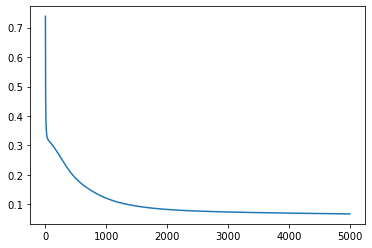

In [12]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

'''Input資料'''
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=.2)
X, Y = X.T, Y.reshape(1, Y.shape[0])

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def setParameters(X, Y, hidden_size):
    np.random.seed(3)
    input_size = X.shape[0] # number of neurons in input layer
    output_size = Y.shape[0] # number of neurons in output layer.
    W1 = np.random.randn(hidden_size, input_size)*np.sqrt(2/input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size)*np.sqrt(2/hidden_size)
    b2 = np.zeros((output_size, 1))
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
# Python implementation
    np.random.randn(output_size, hidden_size)*np.sqrt(2/hidden_size)
    np.random.randn(output_size, hidden_size)*0.01

def forwardPropagation(X, params):
    Z1 = np.dot(params['W1'], X)+params['b1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(params['W2'], A1)+params['b2']
    y = sigmoid(Z2)  
    return y, {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': y}

def cost(predict, actual):
    m = actual.shape[1]
    cost__ = -np.sum(np.multiply(np.log(predict), actual) + np.multiply((1 - actual), np.log(1 - predict)))/m
    return np.squeeze(cost__)

def backPropagation(X, Y, params, cache):
    m = X.shape[1]
    dy = cache['y'] - Y
    dW2 = (1 / m) * np.dot(dy, np.transpose(cache['A1']))
    db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
    dZ1 = np.dot(np.transpose(params['W2']), dy) * (1-np.power(cache['A1'], 2))
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def updateParameters(gradients, params, learning_rate = 1.2):
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

def fit(X, Y, learning_rate, hidden_size, number_of_iterations = 5000):
    params = setParameters(X, Y, hidden_size)
    cost_ = []
    for j in range(number_of_iterations):
        y, cache = forwardPropagation(X, params)
        costit = cost(y, Y)
        gradients = backPropagation(X, Y, params, cache)
        params = updateParameters(gradients, params, learning_rate)
        cost_.append(costit)
    return params, cost_

params, cost_ = fit(X, Y, 0.3, 5, 5000)
plt.plot(cost_)
print(min(cost_))
print(max(cost_))

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

class dlnet:
    def __init__(self, x, y):
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[1]))
        self.L=2
        self.dims = [9, 15, 1]
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[1]
        
def nInit(self):
    np.random.seed(1)
    self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
    self.param['b1'] = np.zeros((self.dims[1], 1))        
    self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
    self.param['b2'] = np.zeros((self.dims[2], 1))                
    return

def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def forward(self):
    Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
    A1 = Relu(Z1)
    self.ch['Z1'],self.ch['A1']=Z1,A1
        
    Z2 = self.param['W2'].dot(A1) + self.param['b2']  
    A2 = Sigmoid(Z2)
    self.ch['Z2'],self.ch['A2']=Z2,A2
    self.Yh=A2
    loss=self.nloss(A2)
    return self.Yh, loss
    
squared_errors = (self.Yh - self.Y) ** 2
self.Loss= np.sum(squared_errors)
def nloss(self,Yh):
    loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
    return loss
    
def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x
def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ
def backward(self):
    dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    
        
    dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])    
    dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
    dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
    dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
                            
    dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])        
    dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
    dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
    dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  
        
    self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
    self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
    self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
    self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2
        
nn = dlnet(x,y)
nn.gd(x, y, iter = 15000)
def gd(self,X, Y, iter = 3000):
    np.random.seed(1)                         
    self.nInit()
    for i in range(0, iter):
        Yh, loss=self.forward()
        self.backward()
        if i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, loss))
            self.loss.append(loss)
    return

In [8]:
'''example for XOR problem'''
from numpy import exp, array, random, dot

class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1

class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2

  # The Sigmoid function, pass the weighted sum of the inputs through this function to
  # normalize them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

  # The derivative of the Sigmoid function,indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

  # We train the neural network through a process of trial and error.
  # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
          # Pass the training set through our neural network
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)

          # Calculate the error for layer 2 (The difference between the desired output
          # and the predicted output).
            layer2_error = training_set_outputs - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

          # Calculate the error for layer 1 (By looking at the weights in layer 1,
          # we can determine by how much layer 1 contributed to the error in layer 2).
            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)

          # Calculate how much to adjust the weights by
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)

          # Adjust the weights.
            self.layer1.synaptic_weights += layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment

  # The neural network thinks.
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2

  # The neural network prints its weights
    def print_weights(self):
        print("    Layer 1 (4 neurons, each with 3 inputs): ") 
        print(self.layer1.synaptic_weights) 
        print("    Layer 2 (1 neuron, with 4 inputs):") 
        print(self.layer2.synaptic_weights) 

if __name__ == "__main__":

  # Seed the random number generator
    random.seed(1)

  # Create layer 1 (4 neurons, each with 3 inputs)
    layer1 = NeuronLayer(4, 3)

  # Create layer 2 (a single neuron with 4 inputs)
    layer2 = NeuronLayer(1, 4)

  # Combine the layers to create a neural network
    neural_network = NeuralNetwork(layer1, layer2)

    print("Stage 1) Random starting synaptic weights: ") 
    neural_network.print_weights()

  # The training set. We have 7 examples, each consisting of 3 input values
  # and 1 output value.
    training_set_inputs = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]])
    training_set_outputs = array([[0, 1, 1, 1, 1, 0, 0]]).T

  # Train the neural network using the training set.
  # Do it 60,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 60000)

    print("Stage 2) New synaptic weights after training: ") 
    neural_network.print_weights()

  # Test the neural network with a new situation.
    print("Stage 3) Considering a new situation [1, 1, 0] -> ?: ") 
    hidden_state, output = neural_network.think(array([[1, 1, 0], [0, 1, 1]]))
    print(output.T) 

Stage 1) Random starting synaptic weights: 
    Layer 1 (4 neurons, each with 3 inputs): 
[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
    Layer 2 (1 neuron, with 4 inputs):
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Stage 2) New synaptic weights after training: 
    Layer 1 (4 neurons, each with 3 inputs): 
[[ 0.3122465   4.57704063 -6.15329916 -8.75834924]
 [ 0.19676933 -8.74975548 -6.1638187   4.40720501]
 [-0.03327074 -0.58272995  0.08319184 -0.39787635]]
    Layer 2 (1 neuron, with 4 inputs):
[[ -8.18850925]
 [ 10.13210706]
 [-21.33532796]
 [  9.90935111]]
Stage 3) Considering a new situation [1, 1, 0] -> ?: 
[[0.0078876  0.99481481]]
